In [36]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

np.set_printoptions(precision=4)


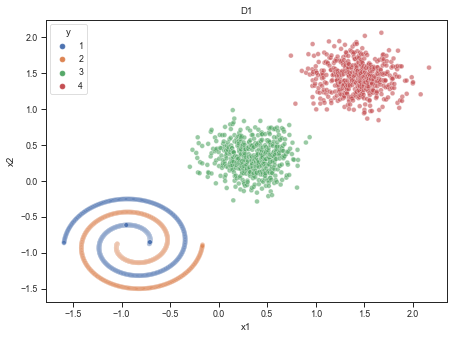

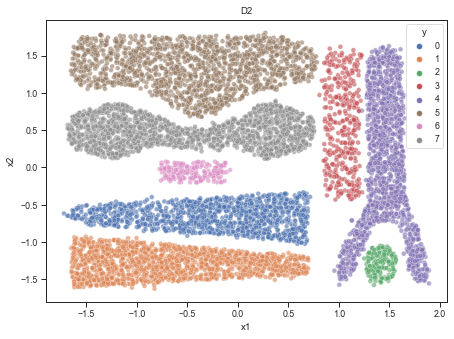

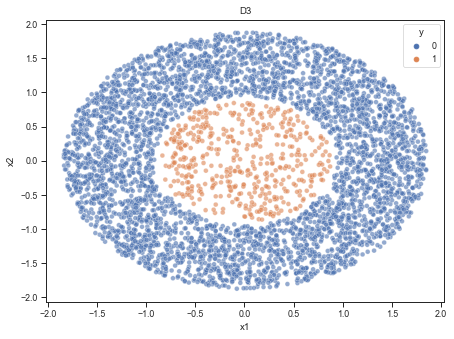

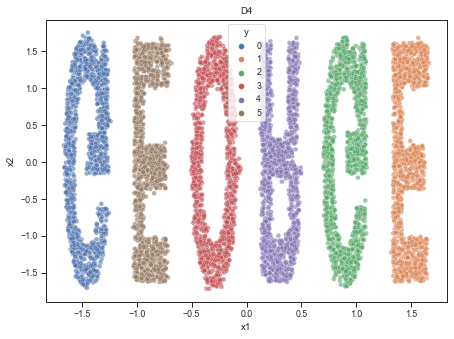

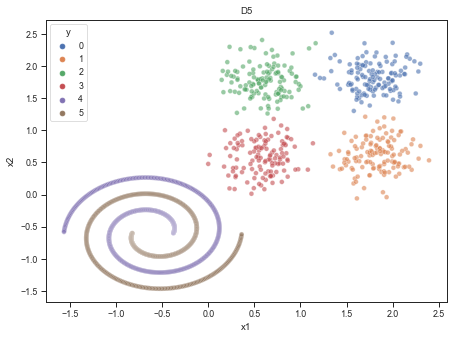

In [37]:
# Part a

def load_data(file_path, normalized=True):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                tokens = line.split(',')
                x1 = float(tokens[0])
                x2 = float(tokens[1])
                y = int(tokens[2])
                data.append([x1, x2, y])
            except:
                pass
    df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
    if normalized:
        X = df[['x1', 'x2']]
        y = df['y']
        X = X.apply(lambda x: (x - np.mean(x)) / np.std(x))
        df = pd.concat([X, y], axis=1)
    return df


def plot_df(df, title):
    ax = sns.scatterplot(df, y='x2', x='x1', hue='y',
                         palette="deep", alpha=0.6)
    ax.set(title=title)
    plt.savefig(f"P3_a_{title}.png")
    plt.show()


def plot_all():
    for i in range(1, 6):
        file_path = f"data/P3/D{i}.txt"
        df = load_data(file_path)
        plot_df(df, f"D{i}")


plot_all()


In [38]:
# Part b

def euclidean(x, X):
    """Return the Euclidean distances between
    an instance x and the dataset X."""
    return np.sqrt(np.sum((x - X)**2, axis=1))


def DBScan(X, Epsilon=0.1, MinPoints=5, Distance=euclidean):
    NOT_CHECKED = -2
    ISOLATED = -1
    labels = np.ones(X.shape[0], dtype=int) * NOT_CHECKED
    cluster = 0
    for i in range(0, X.shape[0]):
        if labels[i] != NOT_CHECKED:
            continue
        neighbors = list(np.where(Distance(X[i], X) < Epsilon)[0])
        if len(neighbors) < MinPoints:
            labels[i] = ISOLATED
        else:
            # Expands cluster from a given point until
            # neighborhood boundaries are reached.
            labels[i] = cluster
            j = 0
            while j < len(neighbors):
                p = neighbors[j]
                if labels[p] == ISOLATED:
                    labels[p] = cluster
                elif labels[p] == NOT_CHECKED:
                    labels[p] = cluster
                    new_nbrs = list(np.where(Distance(X[p], X) < Epsilon)[0])
                    if len(new_nbrs) >= MinPoints:
                        neighbors = neighbors + new_nbrs
                j += 1
            cluster += 1
    labels[labels == ISOLATED] = cluster
    return labels


Results for D1:
Epsilon: 0.177, MinPoints: 3
Number of instances in each cluster (y_pred):
{0: 500, 1: 500, 2: 500, 3: 497, 4: 3}


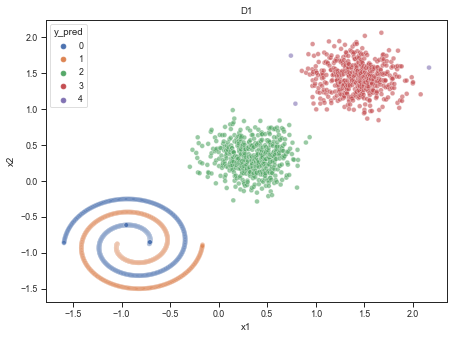

Results for D2:
Epsilon: 0.0643, MinPoints: 3
Number of instances in each cluster (y_pred):
{0: 1455, 1: 182, 2: 1389, 3: 1449, 4: 1112, 5: 1557, 6: 263, 7: 175, 8: 77, 9: 3, 10: 4, 11: 3, 12: 8}


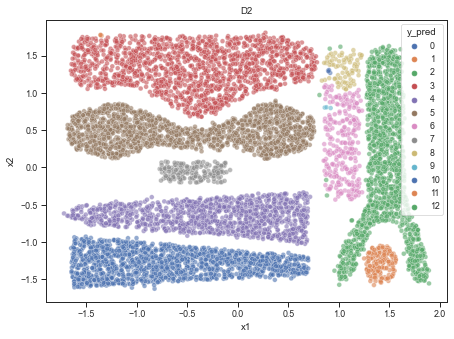

Results for D3:
Epsilon: 0.08, MinPoints: 8
Number of instances in each cluster (y_pred):
{0: 4091, 1: 10, 2: 32, 3: 12, 4: 19, 5: 7, 6: 15, 7: 16, 8: 9, 9: 6, 10: 8, 11: 375}


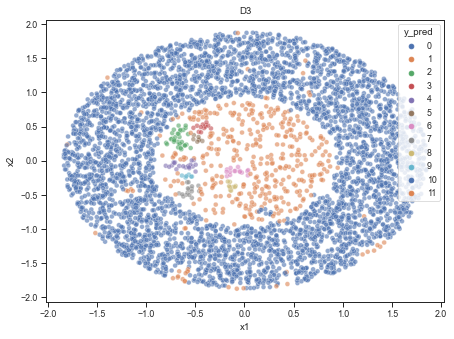

Results for D4:
Epsilon: 0.1, MinPoints: 5
Number of instances in each cluster (y_pred):
{0: 1173, 1: 1053, 2: 1198, 3: 1163, 4: 1206, 5: 1054}


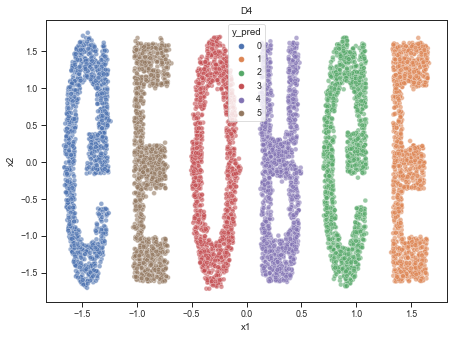

Results for D5:
Epsilon: 0.13, MinPoints: 6
Number of instances in each cluster (y_pred):
{0: 108, 1: 111, 2: 110, 3: 112, 4: 500, 5: 500, 6: 59}


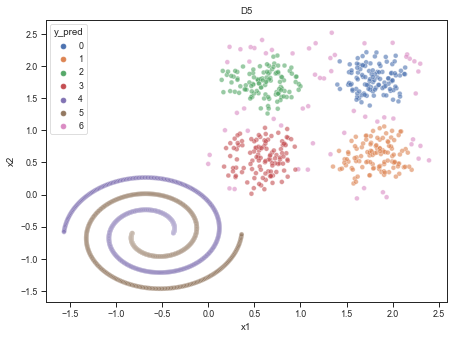

In [39]:
# Part c

def value_counts(a):
    return dict(zip(*np.unique(a, return_counts=True)))


def plot_pred(X, y, title, part='c'):
    df = pd.DataFrame(np.c_[X, y], columns=['x1', 'x2', 'y_pred'])
    df['y_pred'] = df['y_pred'].astype(int)
    ax = sns.scatterplot(df, y='x2', x='x1', hue='y_pred',
                         palette="deep", alpha=0.6)
    ax.set(title=title)
    plt.savefig(f"P3_{part}_{title}.png")
    plt.show()


cases = (
    ('D1', 0.177, 3),
    ('D2', 0.0643, 3),
    ('D3', 0.08, 8),
    ('D4', 0.1, 5),
    ('D5', 0.13, 6),
)

for title, eps, min_pts in cases:
    df = load_data(f'data/P3/{title}.txt')
    X = df[['x1', 'x2']].values
    y_pred = DBScan(X, eps, min_pts)
    print(f"Results for {title}:")
    print(f"Epsilon: {eps}, MinPoints: {min_pts}")
    print(f"Number of instances in each cluster (y_pred):")
    print(value_counts(y_pred))
    plot_pred(X, y_pred, title)


In [40]:
# Part d

def DBScanPredict(X_train, dbscan_cluster_labels, X_test, k=3, Distance=euclidean):
    pred = np.zeros(X_test.shape[0], dtype=int)
    for i in range(X_test.shape[0]):
        dists = Distance(X_test[i], X_train)
        knn = np.argsort(dists)[:k]
        knn_labels = dbscan_cluster_labels[knn]
        labels, counts = np.unique(knn_labels, return_counts=True)
        pred[i] = labels[np.argmax(counts)]
    return pred


Results for D1 with 1-NN:
Epsilon: 0.177, MinPoints: 3
Purity: 1.0
Entropy: 0.0
Accuracy: 0.75
Number of instances in each cluster (y_pred):
{0: 75, 1: 75, 2: 75, 3: 75}


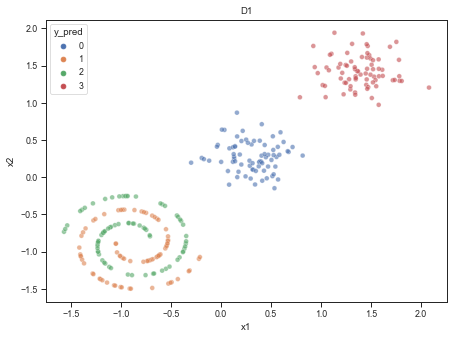

Results for D2 with 1-NN:
Epsilon: 0.0643, MinPoints: 3
Purity: 1.0
Entropy: 0.0
Accuracy: 0.9705
Number of instances in each cluster (y_pred):
{0: 218, 1: 218, 2: 167, 3: 209, 4: 234, 5: 26, 6: 12, 7: 15, 8: 27, 9: 19, 10: 2, 13: 1, 15: 4}


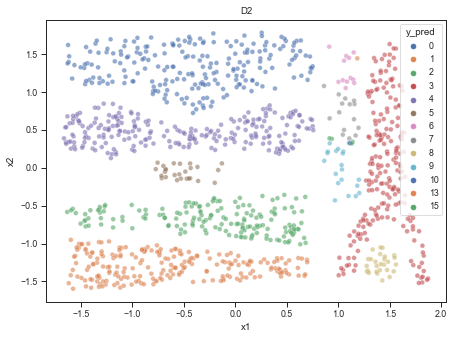

Results for D3 with 1-NN:
Epsilon: 0.08, MinPoints: 8
Purity: 0.9464
Entropy: 0.1252
Accuracy: 0.4072
Number of instances in each cluster (y_pred):
{0: 146, 1: 230, 2: 50, 3: 107, 4: 19, 5: 5, 6: 5, 7: 5, 8: 2, 9: 4, 10: 5, 11: 3, 12: 2, 13: 5, 14: 3, 15: 1, 16: 1, 17: 2, 20: 3, 21: 3, 23: 1, 24: 88}


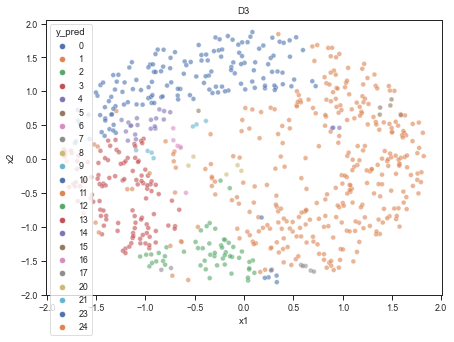

Results for D4 with 1-NN:
Epsilon: 0.1, MinPoints: 5
Purity: 1.0
Entropy: 0.0
Accuracy: 1.0
Number of instances in each cluster (y_pred):
{0: 158, 1: 180, 2: 181, 3: 175, 4: 176, 5: 158}


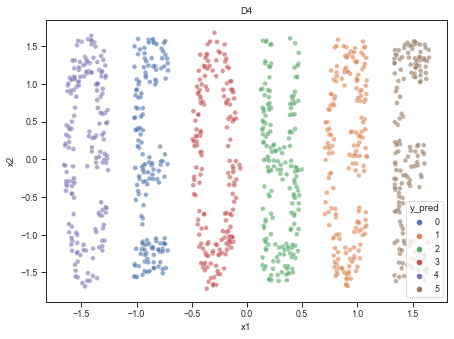

Results for D5 with 1-NN:
Epsilon: 0.13, MinPoints: 6
Purity: 0.9733
Entropy: 0.0922
Accuracy: 0.9333
Number of instances in each cluster (y_pred):
{0: 75, 1: 16, 2: 75, 3: 14, 4: 13, 5: 17, 6: 3, 7: 12}


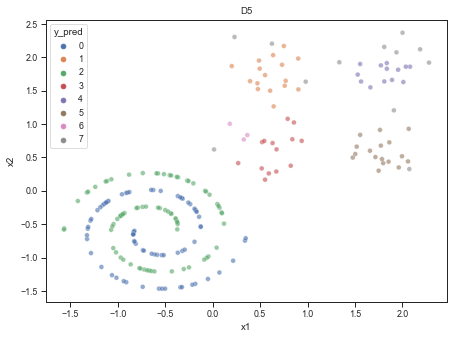

In [41]:
# Part e
from sklearn.model_selection import train_test_split


def confusion_matrix(y_true, y_pred, labels):
    """Customized only for clustering task (Not classification)"""
    m = np.zeros((len(labels), len(labels)), dtype=int)
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            m[i, j] = np.sum((y_true == i) & (y_pred == labels[j]))
    return m


def accuracy_score(y_true, y_pred):
    """Customized only for clustering task (Not classification)"""
    import itertools
    labels, cnts = np.unique(y_pred, return_counts=True)
    idx = np.argsort(-cnts)
    labels, cnts = labels[idx], cnts[idx]
    s = min(8, len(labels))
    labels = labels[:s]
    permutations = itertools.permutations(labels)
    max_score = 0
    for prt in permutations:
        cm = confusion_matrix(y_true, y_pred, prt)
        score = np.sum(np.diag(cm)) / len(y_pred)
        if score > max_score:
            max_score = score
    return max_score


def purity_score(y_true, y_pred):
    s = 0
    for c in np.unique(y_pred):
        _, lcnt = np.unique(y_true[y_pred == c], return_counts=True)
        s += np.max(lcnt)
    return s / len(y_pred)


def entropy_score(y_true, y_pred):
    s = 0
    for c in np.unique(y_pred):
        _, lcnt = np.unique(y_true[y_pred == c], return_counts=True)
        m_c = np.sum(lcnt)
        E_c = -np.sum([(t/m_c) * np.log2(t/m_c) for t in lcnt])
        m = len(y_pred)
        s += (m_c/m) * E_c
    return s


def eval(k, part='e'):
    for title, eps, min_pts in cases:
        df = load_data(f'data/P3/{title}.txt')
        X = df[['x1', 'x2']].values
        y = df['y'].values
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.85, stratify=y, random_state=2)
        cluster_labels = DBScan(X_train, eps, min_pts)
        y_pred = DBScanPredict(X_train, cluster_labels, X_test, k=k)
        print(f"Results for {title} with {k}-NN:")
        print(f"Epsilon: {eps}, MinPoints: {min_pts}")
        print('Purity:', round(purity_score(y_test, y_pred), 4))
        print('Entropy:', round(entropy_score(y_test, y_pred), 4))
        print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))
        print("Number of instances in each cluster (y_pred):")
        print(value_counts(y_pred))
        plot_pred(X_test, y_pred, title, part)


eval(k=1)


Results for D1 with 3-NN:
Epsilon: 0.177, MinPoints: 3
Purity: 1.0
Entropy: 0.0
Accuracy: 0.75
Number of instances in each cluster (y_pred):
{0: 75, 1: 75, 2: 75, 3: 75}


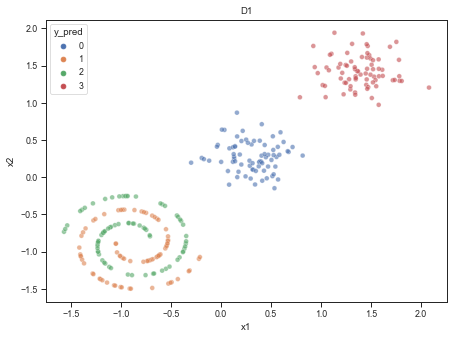

Results for D2 with 3-NN:
Epsilon: 0.0643, MinPoints: 3
Purity: 1.0
Entropy: 0.0
Accuracy: 0.9714
Number of instances in each cluster (y_pred):
{0: 218, 1: 218, 2: 167, 3: 209, 4: 234, 5: 26, 6: 13, 7: 15, 8: 27, 9: 20, 10: 3, 15: 2}


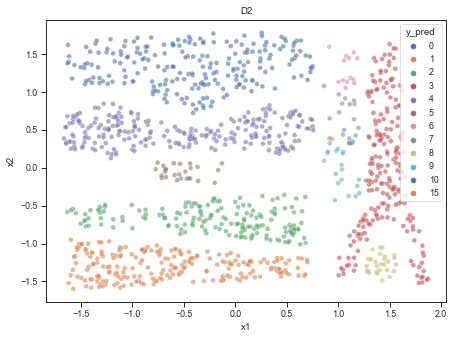

Results for D3 with 3-NN:
Epsilon: 0.08, MinPoints: 8
Purity: 0.9565
Entropy: 0.1319
Accuracy: 0.4087
Number of instances in each cluster (y_pred):
{0: 149, 1: 233, 2: 52, 3: 112, 4: 19, 5: 4, 6: 7, 7: 5, 8: 2, 9: 3, 10: 6, 11: 2, 12: 1, 13: 5, 14: 4, 15: 1, 16: 1, 17: 1, 20: 2, 21: 2, 23: 1, 24: 78}


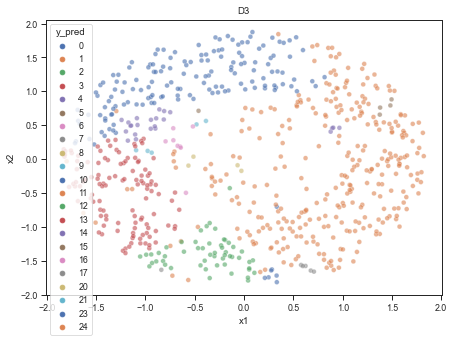

Results for D4 with 3-NN:
Epsilon: 0.1, MinPoints: 5
Purity: 1.0
Entropy: 0.0
Accuracy: 1.0
Number of instances in each cluster (y_pred):
{0: 158, 1: 180, 2: 181, 3: 175, 4: 176, 5: 158}


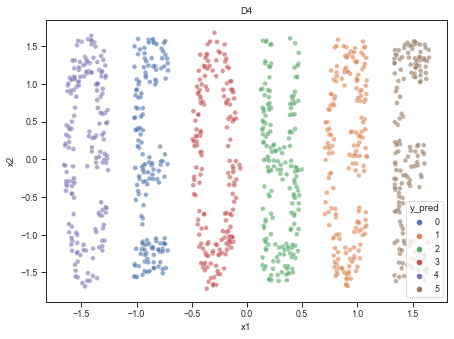

Results for D5 with 3-NN:
Epsilon: 0.13, MinPoints: 6
Purity: 0.9867
Entropy: 0.0462
Accuracy: 0.9467
Number of instances in each cluster (y_pred):
{0: 75, 1: 17, 2: 75, 3: 14, 4: 14, 5: 18, 6: 4, 7: 8}


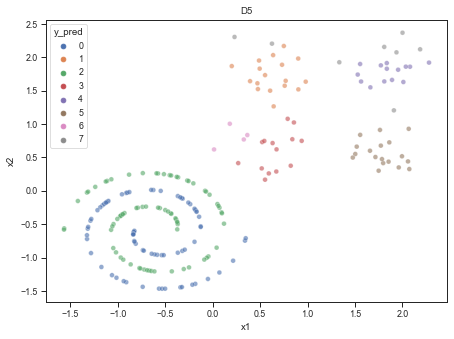

In [42]:
# Part f1
eval(k=3, part='f1')

Results for D1 with 5-NN:
Epsilon: 0.177, MinPoints: 3
Purity: 1.0
Entropy: 0.0
Accuracy: 0.75
Number of instances in each cluster (y_pred):
{0: 75, 1: 75, 2: 75, 3: 75}


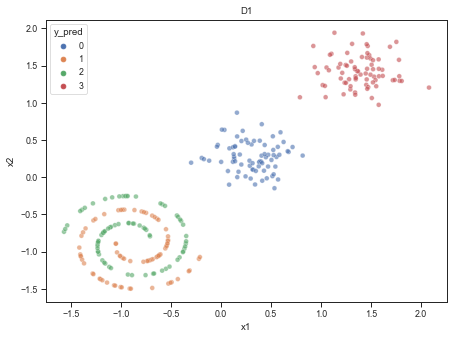

Results for D2 with 5-NN:
Epsilon: 0.0643, MinPoints: 3
Purity: 1.0
Entropy: 0.0
Accuracy: 0.9731
Number of instances in each cluster (y_pred):
{0: 218, 1: 218, 2: 167, 3: 209, 4: 234, 5: 26, 6: 13, 7: 15, 8: 27, 9: 22, 10: 1, 15: 2}


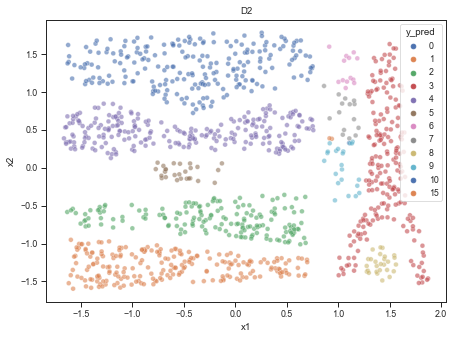

Results for D3 with 5-NN:
Epsilon: 0.08, MinPoints: 8
Purity: 0.971
Entropy: 0.0948
Accuracy: 0.4087
Number of instances in each cluster (y_pred):
{0: 151, 1: 235, 2: 53, 3: 114, 4: 18, 5: 4, 6: 7, 7: 5, 8: 2, 9: 5, 10: 6, 11: 3, 12: 2, 13: 4, 14: 4, 15: 1, 16: 1, 17: 1, 20: 3, 21: 2, 23: 3, 24: 66}


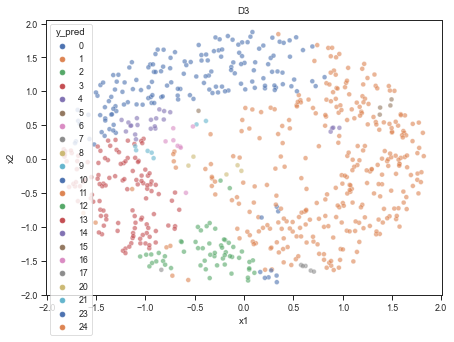

Results for D4 with 5-NN:
Epsilon: 0.1, MinPoints: 5
Purity: 1.0
Entropy: 0.0
Accuracy: 1.0
Number of instances in each cluster (y_pred):
{0: 158, 1: 180, 2: 181, 3: 175, 4: 176, 5: 158}


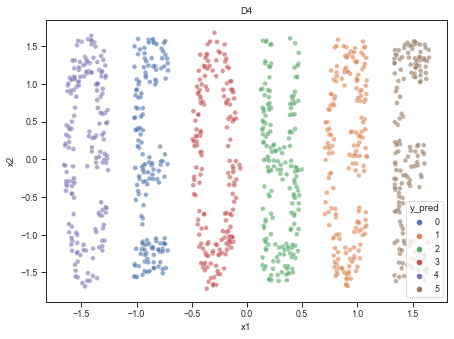

Results for D5 with 5-NN:
Epsilon: 0.13, MinPoints: 6
Purity: 0.9867
Entropy: 0.0462
Accuracy: 0.9467
Number of instances in each cluster (y_pred):
{0: 75, 1: 17, 2: 75, 3: 14, 4: 14, 5: 18, 6: 4, 7: 8}


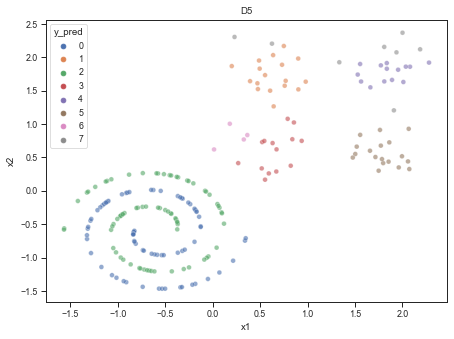

In [43]:
# Part f2
eval(k=5, part='f2')